In [1]:
import importlib
import models
import helper_funtions
import preprocess
import settings

importlib.reload(settings)
importlib.reload(models)
importlib.reload(helper_funtions)
importlib.reload(preprocess)

import torch
import numpy as np
from models.LSTM import LSTM_HumanFi, CNN_LSTM, CNN_BiLSTM_TemporalAttention, CNN_BiLSTM_ChannelAttention, CNN_BiLSTM_DualAttention, CNN_BiLSTM_Attention
from models.RadioNet import RadioNet_NeuralWave
from models.ResNet import ECAResNet1D, ECABasicBlock1D, ResNet1D_JARILWWF, OptResNet1D_JARILWWF, OptECAResNet1D_JARILWWF, CustomResNet1D, CustomECAResNet1D
from models.TemporalConvNet import TemporalConvNet
from helper_funtions import grid_search, get_learning_curve_data, plot_learning_curves, run_with_seeds, run_experiment_with_seeds
from preprocess import DataPreprocessor
from settings import DEVICE, CRITERION, folder_path_5ghz_10hz_collected, folder_path_5ghz_200hz_collected, folder_path_60ghz_collected, output_path, NUM_EPOCHS, ROWS_PER_SECOND, INPUT_DIM

In [2]:
# temporalconvnet
# {'num_inputs': x, 'num_channels': [64, 128, 128], 'kernel_size': 2, 'dropout': 0.5}
# mixup

signal_configs = {
    '5ghz_10hz': {
        'model_class': TemporalConvNet,
        'model_args': {
            'num_inputs': INPUT_DIM['5ghz_10hz'],
            'num_channels': [64, 128, 128],
            'kernel_size': 2,
            'dropout': 0.5
        },
        'folder_path': folder_path_5ghz_10hz_collected,
        'background_subtraction': True,
        'num_epochs': NUM_EPOCHS,
        'rows_per_second': ROWS_PER_SECOND['5ghz_10hz']
    },
    '5ghz_200hz': {
        'model_class': TemporalConvNet,
        'model_args': {
            'num_inputs': INPUT_DIM['5ghz_200hz'],
            'num_channels': [64, 128, 128],
            'kernel_size': 2,
            'dropout': 0.5
        },
        'folder_path': folder_path_5ghz_200hz_collected,
        'background_subtraction': True,
        'num_epochs': NUM_EPOCHS,
        'rows_per_second': ROWS_PER_SECOND['5ghz_200hz']
    },
    '60ghz_collected': {
        'model_class': TemporalConvNet,
        'model_args': {
            'num_inputs': INPUT_DIM['60ghz_collected'],
            'num_channels': [64, 128, 128],
            'kernel_size': 2,
            'dropout': 0.5
        },
        'folder_path': folder_path_60ghz_collected,
        'background_subtraction': True,
        'num_epochs': NUM_EPOCHS,
        'rows_per_second': ROWS_PER_SECOND['60ghz_collected']
    }
}

train_splits = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
accuracy_type = 2 # 1 for validation accuracy, 2 for test accuracy
num_seeds = 3

In [3]:
results_per_signal, stds_per_signal = run_experiment_with_seeds(experiment_func=get_learning_curve_data,
                                                                signal_configs=signal_configs,
                                                                varying_param_name='train_splits',
                                                                varying_param_value=train_splits,
                                                                n_seeds=num_seeds,
                                                                accuracy_type=accuracy_type,
                                                                seconds_per_sample=5)

Running experiment for 5ghz_10hz...

--- Running seed 42 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 138 (no improvement in 50 epochs)
Training time:  0:00:58.633903

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 100 (no improvement in 50 epochs)
Training time:  0:01:04.385808

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 131 (no improvement in 50 epochs)
Training time:  0:01:50.792394

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 211 (no improvement in 50 epochs)
Training time:  0:03:38.947804

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 345 (no improvement in 50 epochs)
Training time:  0:07:07.718202

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 200 (no improvement in 50 epochs)
Training time:  0:04:57.305881

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 218 (no improvement in 50 epochs)
Training time:  0:05:46.484790

--- Running seed 420 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 117 (no improvement in 50 epochs)
Training time:  0:00:46.604262

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 248 (no improvement in 50 epochs)
Training time:  0:02:30.074246

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 89 (no improvement in 50 epochs)
Training time:  0:01:10.908851

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 227 (no improvement in 50 epochs)
Training time:  0:03:50.970152

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 236 (no improvement in 50 epochs)
Training time:  0:07:52.386317

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 239 (no improvement in 50 epochs)
Training time:  0:08:17.837069

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 238 (no improvement in 50 epochs)
Training time:  0:06:21.242056

--- Running seed 101010 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 121 (no improvement in 50 epochs)
Training time:  0:00:49.505324

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 266 (no improvement in 50 epochs)
Training time:  0:02:44.864030

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 93 (no improvement in 50 epochs)
Training time:  0:01:21.531457

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 221 (no improvement in 50 epochs)
Training time:  0:03:43.589415

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 165 (no improvement in 50 epochs)
Training time:  0:04:39.781457

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 198 (no improvement in 50 epochs)
Training time:  0:14:16.897638

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 210 (no improvement in 50 epochs)
Training time:  0:09:09.540257
seed outputs:  [([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.44, 0.46, 0.71, 0.83, 0.9, 0.9, 0.94], [0.49, 0.46, 0.66, 0.74, 0.83, 0.84, 0.91]), ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.47, 0.61, 0.71, 0.86, 0.87, 0.9, 0.96], [0.54, 0.6, 0.69, 0.81, 0.79, 0.84, 0.9]), ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.51, 0.59, 0.64, 0.84, 0.84, 0.87, 0.94], [0.51, 0.64, 0.7, 0.79, 0.76, 0.87, 0.87])]
Running experiment for 5ghz_200hz...

--- Running seed 42 ---

--- Training split 0.10 ---


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 203 (no improvement in 50 epochs)
Training time:  0:05:33.500675

--- Training split 0.20 ---


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 95 (no improvement in 50 epochs)
Training time:  0:03:57.485684

--- Training split 0.30 ---


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 211 (no improvement in 50 epochs)
Training time:  0:11:39.178372

--- Training split 0.40 ---


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 305 (no improvement in 50 epochs)
Training time:  0:20:39.700881

--- Training split 0.50 ---


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 299 (no improvement in 50 epochs)
Training time:  0:23:26.353300

--- Training split 0.60 ---


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 240 (no improvement in 50 epochs)
Training time:  0:20:29.722427

--- Training split 0.70 ---


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 267 (no improvement in 50 epochs)
Training time:  0:16:22.446134

--- Running seed 420 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 117 (no improvement in 50 epochs)
Training time:  0:00:40.114969

--- Training split 0.20 ---


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 131 (no improvement in 50 epochs)
Training time:  0:01:08.263227

--- Training split 0.30 ---


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 264 (no improvement in 50 epochs)
Training time:  0:03:02.842411

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 308 (no improvement in 50 epochs)
Training time:  0:04:22.182536

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 339 (no improvement in 50 epochs)
Training time:  0:05:53.726995

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 261 (no improvement in 50 epochs)
Training time:  0:05:12.202867

--- Training split 0.70 ---


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 282 (no improvement in 50 epochs)
Training time:  0:06:24.337399

--- Running seed 101010 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 215 (no improvement in 50 epochs)
Training time:  0:01:13.934978

--- Training split 0.20 ---


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 105 (no improvement in 50 epochs)
Training time:  0:00:54.276134

--- Training split 0.30 ---


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 93 (no improvement in 50 epochs)
Training time:  0:01:03.954069

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 278 (no improvement in 50 epochs)
Training time:  0:03:57.210474

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 303 (no improvement in 50 epochs)
Training time:  0:05:15.682091

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 226 (no improvement in 50 epochs)
Training time:  0:04:29.795496

--- Training split 0.70 ---


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 354 (no improvement in 50 epochs)
Training time:  0:08:05.653869
seed outputs:  [([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.53, 0.65, 0.77, 0.94, 0.94, 0.94, 0.97], [0.39, 0.56, 0.73, 0.74, 0.85, 0.92, 0.94]), ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.42, 0.65, 0.76, 0.89, 0.94, 0.97, 0.98], [0.44, 0.66, 0.68, 0.82, 0.84, 0.89, 0.95]), ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.52, 0.65, 0.58, 0.92, 0.95, 0.94, 0.98], [0.42, 0.6, 0.65, 0.79, 0.82, 0.9, 0.87])]
Running experiment for 60ghz_collected...

--- Running seed 42 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 288 (no improvement in 50 epochs)
Training time:  0:01:48.674294

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 182 (no improvement in 50 epochs)
Training time:  0:01:45.137807

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 207 (no improvement in 50 epochs)
Training time:  0:02:35.325325

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 291 (no improvement in 50 epochs)
Training time:  0:04:41.593453

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 290 (no improvement in 50 epochs)
Training time:  0:05:29.164723

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 304 (no improvement in 50 epochs)
Training time:  0:06:39.003179

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 151 (no improvement in 50 epochs)
Training time:  0:03:44.132265

--- Running seed 420 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 108 (no improvement in 50 epochs)
Training time:  0:00:40.107473

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 124 (no improvement in 50 epochs)
Training time:  0:01:11.756623

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 126 (no improvement in 50 epochs)
Training time:  0:01:34.798597

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 436 (no improvement in 50 epochs)
Training time:  0:06:51.287163

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 196 (no improvement in 50 epochs)
Training time:  0:03:42.211264

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 213 (no improvement in 50 epochs)
Training time:  0:04:39.834294

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 183 (no improvement in 50 epochs)
Training time:  0:04:32.953336

--- Running seed 101010 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 176 (no improvement in 50 epochs)
Training time:  0:01:07.621197

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 218 (no improvement in 50 epochs)
Training time:  0:02:05.825037

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 203 (no improvement in 50 epochs)
Training time:  0:02:32.910304

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 252 (no improvement in 50 epochs)
Training time:  0:03:57.765263

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 244 (no improvement in 50 epochs)
Training time:  0:04:35.834671

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 242 (no improvement in 50 epochs)
Training time:  0:05:17.512092

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 223 (no improvement in 50 epochs)
Training time:  0:05:34.610058
seed outputs:  [([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.68, 0.68, 0.84, 0.93, 0.9, 0.99, 0.99], [0.74, 0.65, 0.78, 0.82, 0.84, 0.96, 0.94]), ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.65, 0.62, 0.81, 0.91, 0.96, 0.97, 0.99], [0.65, 0.71, 0.71, 0.85, 0.91, 0.96, 0.93]), ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.66, 0.78, 0.82, 0.88, 0.96, 0.96, 0.99], [0.66, 0.69, 0.81, 0.82, 0.93, 0.96, 0.96])]


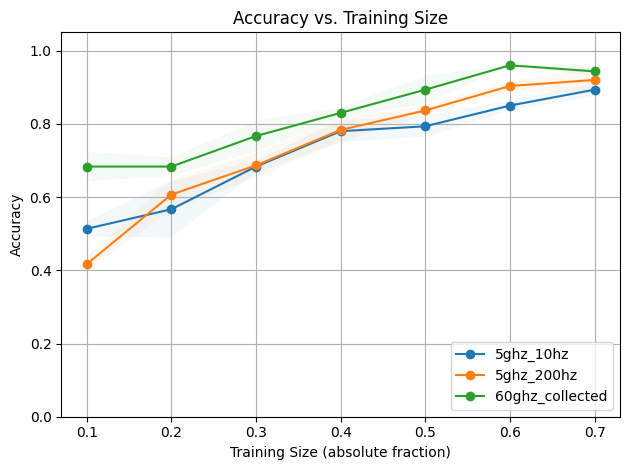

In [4]:
plot_learning_curves(results_dict=results_per_signal, std_dict=stds_per_signal)

In [5]:
results_per_signal, stds_per_signal = run_experiment_with_seeds(experiment_func=get_learning_curve_data,
                                                                signal_configs=signal_configs,
                                                                varying_param_name='train_splits',
                                                                varying_param_value=train_splits,
                                                                n_seeds=num_seeds,
                                                                accuracy_type=accuracy_type,
                                                                seconds_per_sample=3)

Running experiment for 5ghz_10hz...

--- Running seed 42 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 87 (no improvement in 50 epochs)
Training time:  0:00:59.633162

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 94 (no improvement in 50 epochs)
Training time:  0:01:35.006811

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 131 (no improvement in 50 epochs)
Training time:  0:02:51.269406

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 245 (no improvement in 50 epochs)
Training time:  0:06:39.154223

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 196 (no improvement in 50 epochs)
Training time:  0:06:23.942710

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 187 (no improvement in 50 epochs)
Training time:  0:07:03.087403

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 280 (no improvement in 50 epochs)
Training time:  0:11:57.434874

--- Running seed 420 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 83 (no improvement in 50 epochs)
Training time:  0:00:57.576893

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 99 (no improvement in 50 epochs)
Training time:  0:01:39.628402

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 194 (no improvement in 50 epochs)
Training time:  0:04:14.051337

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 219 (no improvement in 50 epochs)
Training time:  0:05:58.385835

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 210 (no improvement in 50 epochs)
Training time:  0:06:50.830392

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 195 (no improvement in 50 epochs)
Training time:  0:07:20.007816

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 247 (no improvement in 50 epochs)
Training time:  0:10:33.152009

--- Running seed 101010 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 86 (no improvement in 50 epochs)
Training time:  0:00:58.604228

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 88 (no improvement in 50 epochs)
Training time:  0:01:30.959575

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 134 (no improvement in 50 epochs)
Training time:  0:02:55.877645

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 267 (no improvement in 50 epochs)
Training time:  0:07:16.120306

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 268 (no improvement in 50 epochs)
Training time:  0:08:45.508224

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 268 (no improvement in 50 epochs)
Training time:  0:10:08.123937

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 210 (no improvement in 50 epochs)
Training time:  0:09:01.535148
seed outputs:  [([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.51, 0.6, 0.68, 0.83, 0.85, 0.88, 0.94], [0.53, 0.63, 0.64, 0.69, 0.74, 0.81, 0.87]), ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.45, 0.64, 0.74, 0.83, 0.87, 0.88, 0.9], [0.54, 0.66, 0.67, 0.74, 0.74, 0.8, 0.88]), ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.53, 0.61, 0.69, 0.83, 0.88, 0.88, 0.95], [0.54, 0.6, 0.67, 0.72, 0.74, 0.82, 0.85])]
Running experiment for 5ghz_200hz...

--- Running seed 42 ---

--- Training split 0.10 ---


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 149 (no improvement in 50 epochs)
Training time:  0:01:33.638842

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 78 (no improvement in 50 epochs)
Training time:  0:01:11.621873

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 233 (no improvement in 50 epochs)
Training time:  0:04:46.589832

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 247 (no improvement in 50 epochs)
Training time:  0:06:07.547164

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 224 (no improvement in 50 epochs)
Training time:  0:06:41.210291

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 170 (no improvement in 50 epochs)
Training time:  0:05:50.410181

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 235 (no improvement in 50 epochs)
Training time:  0:09:08.220714

--- Running seed 420 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 118 (no improvement in 50 epochs)
Training time:  0:01:14.312449

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 85 (no improvement in 50 epochs)
Training time:  0:01:18.221238

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 210 (no improvement in 50 epochs)
Training time:  0:04:12.062251

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 290 (no improvement in 50 epochs)
Training time:  0:07:13.230187

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 160 (no improvement in 50 epochs)
Training time:  0:04:50.446731

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 242 (no improvement in 50 epochs)
Training time:  0:08:20.855585

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 210 (no improvement in 50 epochs)
Training time:  0:08:12.045404

--- Running seed 101010 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 112 (no improvement in 50 epochs)
Training time:  0:01:10.357826

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 96 (no improvement in 50 epochs)
Training time:  0:01:28.210731

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 323 (no improvement in 50 epochs)
Training time:  0:06:31.673129

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 259 (no improvement in 50 epochs)
Training time:  0:06:27.919950

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 191 (no improvement in 50 epochs)
Training time:  0:05:41.399492

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 164 (no improvement in 50 epochs)
Training time:  0:05:37.854776

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 233 (no improvement in 50 epochs)
Training time:  0:09:06.522358
seed outputs:  [([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.49, 0.61, 0.78, 0.91, 0.91, 0.94, 0.96], [0.42, 0.57, 0.69, 0.76, 0.83, 0.84, 0.91]), ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.46, 0.57, 0.76, 0.89, 0.9, 0.95, 0.97], [0.44, 0.6, 0.68, 0.79, 0.79, 0.87, 0.93]), ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.47, 0.59, 0.81, 0.9, 0.92, 0.94, 0.95], [0.53, 0.62, 0.67, 0.74, 0.81, 0.81, 0.92])]
Running experiment for 60ghz_collected...

--- Running seed 42 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 196 (no improvement in 50 epochs)
Training time:  0:02:13.464429

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 210 (no improvement in 50 epochs)
Training time:  0:03:28.759336

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 143 (no improvement in 50 epochs)
Training time:  0:03:09.687391

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 253 (no improvement in 50 epochs)
Training time:  0:06:49.819053

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 234 (no improvement in 50 epochs)
Training time:  0:07:34.806132

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 293 (no improvement in 50 epochs)
Training time:  0:10:55.921007

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 162 (no improvement in 50 epochs)
Training time:  0:06:51.182863

--- Running seed 420 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 229 (no improvement in 50 epochs)
Training time:  0:02:37.150395

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 241 (no improvement in 50 epochs)
Training time:  0:03:59.598071

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 225 (no improvement in 50 epochs)
Training time:  0:04:53.547219

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 112 (no improvement in 50 epochs)
Training time:  0:03:01.427877

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 232 (no improvement in 50 epochs)
Training time:  0:07:30.886949

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 230 (no improvement in 50 epochs)
Training time:  0:08:36.712180

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 202 (no improvement in 50 epochs)
Training time:  0:08:36.536175

--- Running seed 101010 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 275 (no improvement in 50 epochs)
Training time:  0:03:07.713621

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 179 (no improvement in 50 epochs)
Training time:  0:02:59.659384

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 244 (no improvement in 50 epochs)
Training time:  0:05:16.853374

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 146 (no improvement in 50 epochs)
Training time:  0:03:55.752749

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 182 (no improvement in 50 epochs)
Training time:  0:05:51.987411

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 151 (no improvement in 50 epochs)
Training time:  0:05:37.926549

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 224 (no improvement in 50 epochs)
Training time:  0:09:28.365159
seed outputs:  [([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.73, 0.84, 0.81, 0.89, 0.92, 0.97, 0.97], [0.72, 0.77, 0.77, 0.81, 0.93, 0.9, 0.92]), ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.69, 0.85, 0.88, 0.88, 0.93, 0.97, 0.97], [0.72, 0.77, 0.82, 0.82, 0.89, 0.92, 0.91]), ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.78, 0.8, 0.86, 0.87, 0.93, 0.97, 0.97], [0.72, 0.72, 0.78, 0.81, 0.91, 0.91, 0.93])]


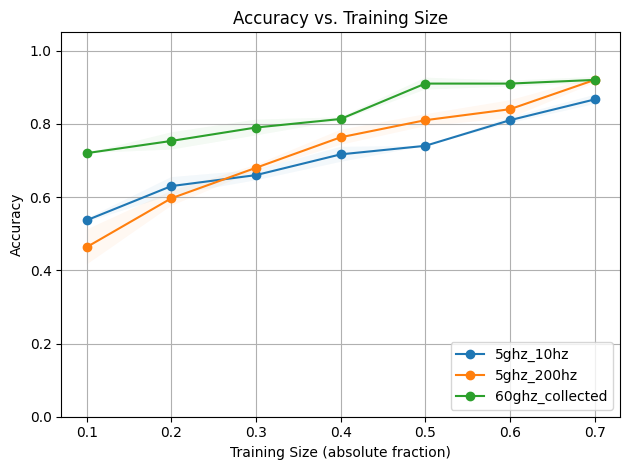

In [6]:
plot_learning_curves(results_dict=results_per_signal, std_dict=stds_per_signal)

In [7]:
results_per_signal, stds_per_signal = run_experiment_with_seeds(experiment_func=get_learning_curve_data,
                                                                signal_configs=signal_configs,
                                                                varying_param_name='train_splits',
                                                                varying_param_value=train_splits,
                                                                n_seeds=num_seeds,
                                                                accuracy_type=accuracy_type,
                                                                seconds_per_sample=2)

Running experiment for 5ghz_10hz...

--- Running seed 42 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 74 (no improvement in 50 epochs)
Training time:  0:01:19.054027

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 109 (no improvement in 50 epochs)
Training time:  0:02:49.542543

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 220 (no improvement in 50 epochs)
Training time:  0:07:23.655637

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 206 (no improvement in 50 epochs)
Training time:  0:08:32.942791

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 160 (no improvement in 50 epochs)
Training time:  0:07:56.170611

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 207 (no improvement in 50 epochs)
Training time:  0:11:46.929046

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 238 (no improvement in 50 epochs)
Training time:  0:15:29.175918

--- Running seed 420 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 77 (no improvement in 50 epochs)
Training time:  0:01:21.885609

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 156 (no improvement in 50 epochs)
Training time:  0:04:01.846398

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 187 (no improvement in 50 epochs)
Training time:  0:06:17.414328

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 281 (no improvement in 50 epochs)
Training time:  0:11:42.394226

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 195 (no improvement in 50 epochs)
Training time:  0:09:42.002263

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 218 (no improvement in 50 epochs)
Training time:  0:12:27.083949

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 196 (no improvement in 50 epochs)
Training time:  0:12:46.484977

--- Running seed 101010 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 83 (no improvement in 50 epochs)
Training time:  0:01:29.183519

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 99 (no improvement in 50 epochs)
Training time:  0:02:33.230406

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 161 (no improvement in 50 epochs)
Training time:  0:05:30.606342

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 266 (no improvement in 50 epochs)
Training time:  0:11:04.575740

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 224 (no improvement in 50 epochs)
Training time:  0:11:05.276822

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 159 (no improvement in 50 epochs)
Training time:  0:09:03.864158

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 203 (no improvement in 50 epochs)
Training time:  0:13:11.005936
seed outputs:  [([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.4, 0.65, 0.73, 0.81, 0.86, 0.88, 0.92], [0.5, 0.55, 0.62, 0.71, 0.75, 0.82, 0.86]), ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.4, 0.63, 0.74, 0.82, 0.86, 0.87, 0.89], [0.5, 0.59, 0.63, 0.7, 0.74, 0.76, 0.8]), ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.47, 0.65, 0.69, 0.83, 0.85, 0.87, 0.93], [0.5, 0.62, 0.62, 0.77, 0.75, 0.76, 0.83])]
Running experiment for 5ghz_200hz...

--- Running seed 42 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 100 (no improvement in 50 epochs)
Training time:  0:01:35.748413

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 106 (no improvement in 50 epochs)
Training time:  0:02:29.940187

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 184 (no improvement in 50 epochs)
Training time:  0:05:34.714435

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 155 (no improvement in 50 epochs)
Training time:  0:05:51.781759

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 177 (no improvement in 50 epochs)
Training time:  0:08:00.782461

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 168 (no improvement in 50 epochs)
Training time:  0:08:41.786495

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 185 (no improvement in 50 epochs)
Training time:  0:10:56.033885

--- Running seed 420 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 78 (no improvement in 50 epochs)
Training time:  0:01:13.996407

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 84 (no improvement in 50 epochs)
Training time:  0:01:57.815378

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 176 (no improvement in 50 epochs)
Training time:  0:05:25.533035

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 135 (no improvement in 50 epochs)
Training time:  0:05:04.096223

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 203 (no improvement in 50 epochs)
Training time:  0:08:55.927128

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 133 (no improvement in 50 epochs)
Training time:  0:06:56.113685

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 170 (no improvement in 50 epochs)
Training time:  0:10:03.450051

--- Running seed 101010 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 86 (no improvement in 50 epochs)
Training time:  0:01:24.792397

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 227 (no improvement in 50 epochs)
Training time:  0:05:20.406520

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 291 (no improvement in 50 epochs)
Training time:  0:08:51.815462

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 236 (no improvement in 50 epochs)
Training time:  0:08:52.074121

--- Training split 0.50 ---


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)



(Device: cuda) Started training model: TemporalConvNet
Early stopping at epoch 161 (no improvement in 50 epochs)
Training time:  0:07:11.762171

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 241 (no improvement in 50 epochs)
Training time:  0:12:24.552311

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 143 (no improvement in 50 epochs)
Training time:  0:08:24.073728
seed outputs:  [([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.5, 0.59, 0.79, 0.86, 0.89, 0.92, 0.96], [0.47, 0.59, 0.63, 0.78, 0.8, 0.82, 0.89]), ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.47, 0.59, 0.79, 0.8, 0.89, 0.92, 0.94], [0.47, 0.57, 0.66, 0.72, 0.83, 0.83, 0.86]), ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.41, 0.66, 0.79, 0.86, 0.9, 0.93, 0.93], [0.44, 0.58, 0.67, 0.83, 0.84, 0.87, 0.89])]
Running experiment for 60ghz_collected...

--- Running seed 42 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 159 (no improvement in 50 epochs)
Training time:  0:02:44.954067

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 224 (no improvement in 50 epochs)
Training time:  0:05:35.399379

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 274 (no improvement in 50 epochs)
Training time:  0:09:05.782288

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 166 (no improvement in 50 epochs)
Training time:  0:07:00.895624

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 227 (no improvement in 50 epochs)
Training time:  0:11:23.710120

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 193 (no improvement in 50 epochs)
Training time:  0:11:11.604226

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 150 (no improvement in 50 epochs)
Training time:  0:09:51.245955

--- Running seed 420 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 151 (no improvement in 50 epochs)
Training time:  0:02:42.128396

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 208 (no improvement in 50 epochs)
Training time:  0:05:23.397638

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 336 (no improvement in 50 epochs)
Training time:  0:11:22.633546

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 331 (no improvement in 50 epochs)
Training time:  0:13:51.151425

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 286 (no improvement in 50 epochs)
Training time:  0:14:14.155480

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 205 (no improvement in 50 epochs)
Training time:  0:11:46.671741

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 177 (no improvement in 50 epochs)
Training time:  0:11:36.884418

--- Running seed 101010 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 206 (no improvement in 50 epochs)
Training time:  0:03:41.612594

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 311 (no improvement in 50 epochs)
Training time:  0:08:05.583813

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 164 (no improvement in 50 epochs)
Training time:  0:05:34.516678

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 178 (no improvement in 50 epochs)
Training time:  0:07:29.150895

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 156 (no improvement in 50 epochs)
Training time:  0:07:45.257049

--- Training split 0.60 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 190 (no improvement in 50 epochs)
Training time:  0:10:46.860141

--- Training split 0.70 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 158 (no improvement in 50 epochs)
Training time:  0:10:07.623306
seed outputs:  [([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.75, 0.79, 0.83, 0.91, 0.9, 0.95, 0.93], [0.72, 0.75, 0.73, 0.82, 0.86, 0.89, 0.9]), ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.69, 0.81, 0.83, 0.88, 0.9, 0.96, 0.96], [0.69, 0.72, 0.74, 0.81, 0.85, 0.86, 0.84]), ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0.71, 0.82, 0.83, 0.86, 0.92, 0.94, 0.93], [0.69, 0.74, 0.77, 0.8, 0.8, 0.9, 0.88])]


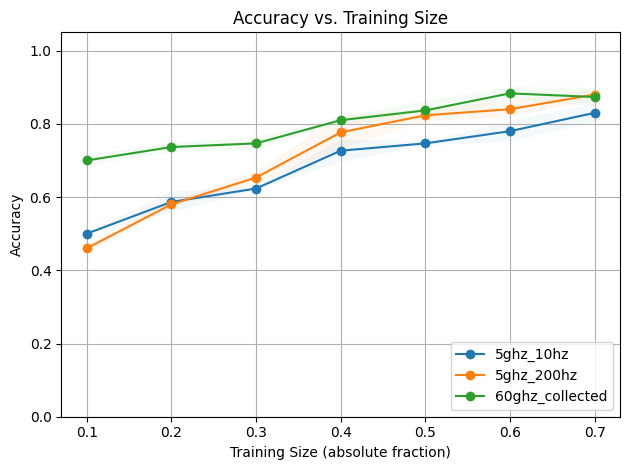

In [8]:
plot_learning_curves(results_dict=results_per_signal, std_dict=stds_per_signal)

In [9]:
results_per_signal, stds_per_signal = run_experiment_with_seeds(experiment_func=get_learning_curve_data,
                                                                signal_configs=signal_configs,
                                                                varying_param_name='train_splits',
                                                                varying_param_value=train_splits,
                                                                n_seeds=num_seeds,
                                                                accuracy_type=accuracy_type,
                                                                seconds_per_sample=1)

Running experiment for 5ghz_10hz...

--- Running seed 42 ---

--- Training split 0.10 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 87 (no improvement in 50 epochs)
Training time:  0:03:12.397875

--- Training split 0.20 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 112 (no improvement in 50 epochs)
Training time:  0:06:01.203679

--- Training split 0.30 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 154 (no improvement in 50 epochs)
Training time:  0:10:57.157268

--- Training split 0.40 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Early stopping at epoch 338 (no improvement in 50 epochs)
Training time:  0:37:28.118197

--- Training split 0.50 ---

(Device: cuda) Started training model: TemporalConvNet


C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


KeyboardInterrupt: 

In [ ]:
plot_learning_curves(results_dict=results_per_signal, std_dict=stds_per_signal)